Column Data Types:
Timestamp              datetime64[ns]
User_ID                        object
Application_Type               object
Signal_Strength                 int64
Latency                         int64
Required_Bandwidth            float64
Allocated_Bandwidth           float64
Resource_Allocation             int64
dtype: object


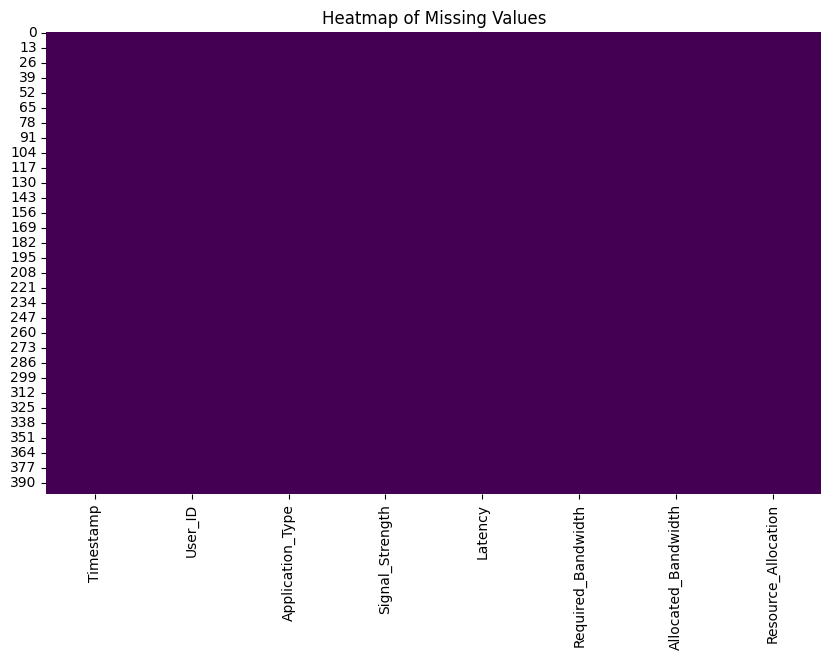

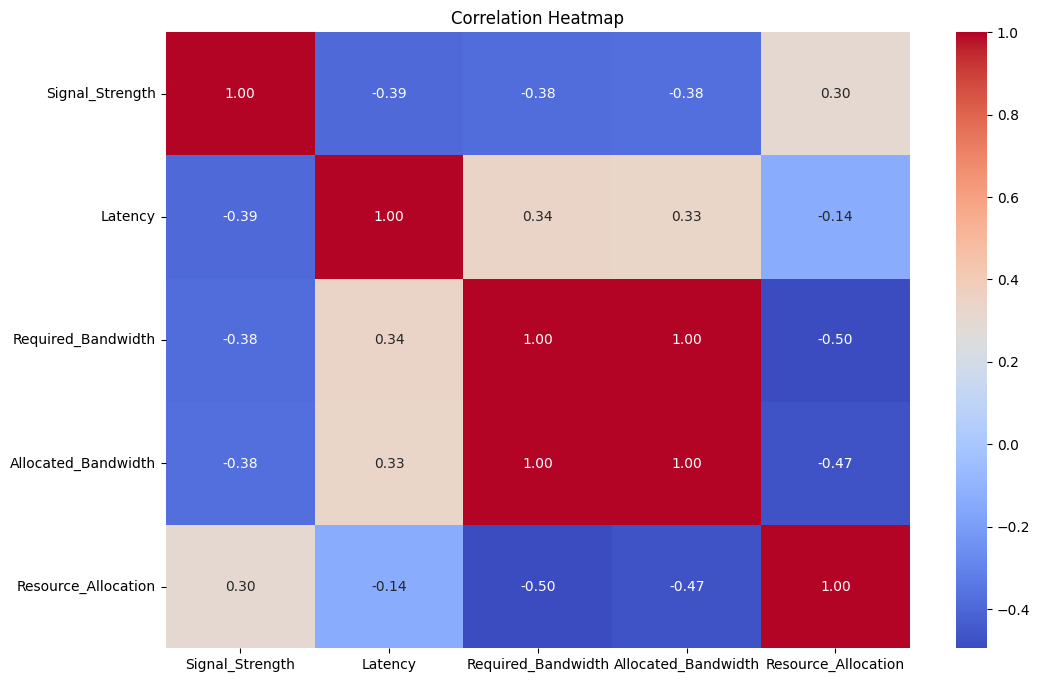

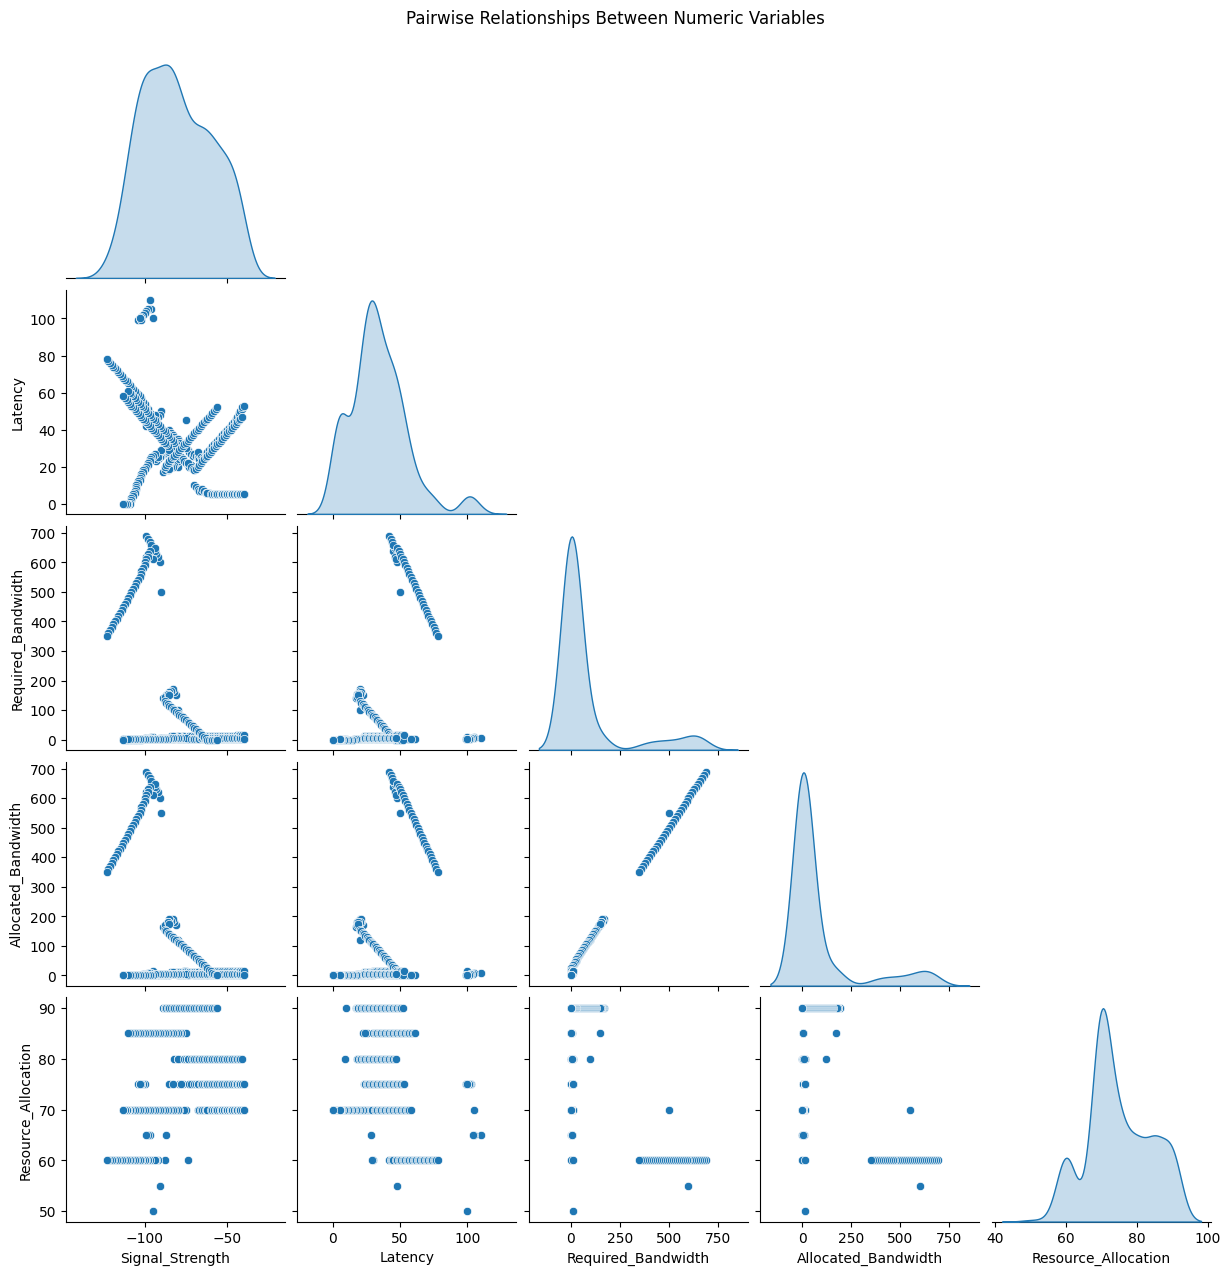

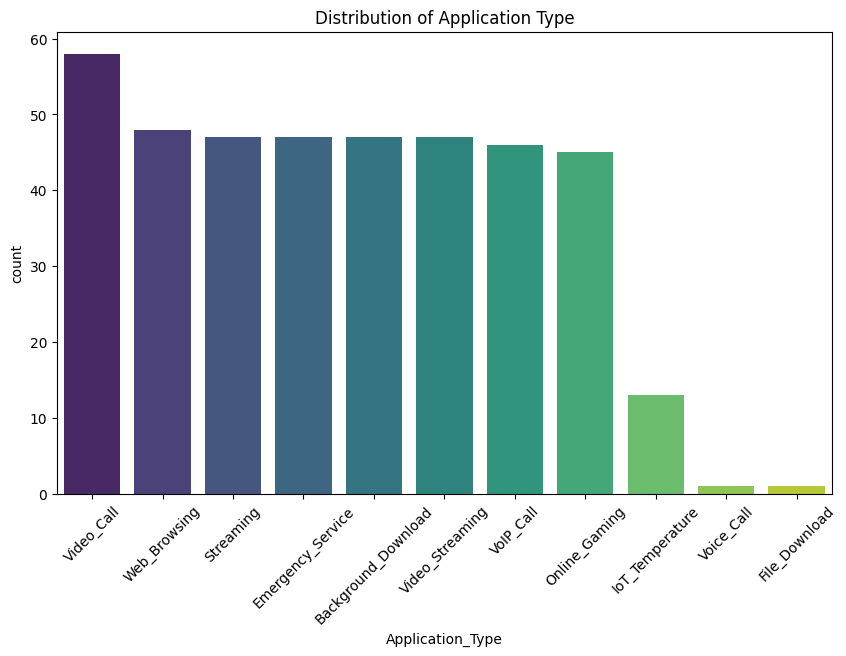

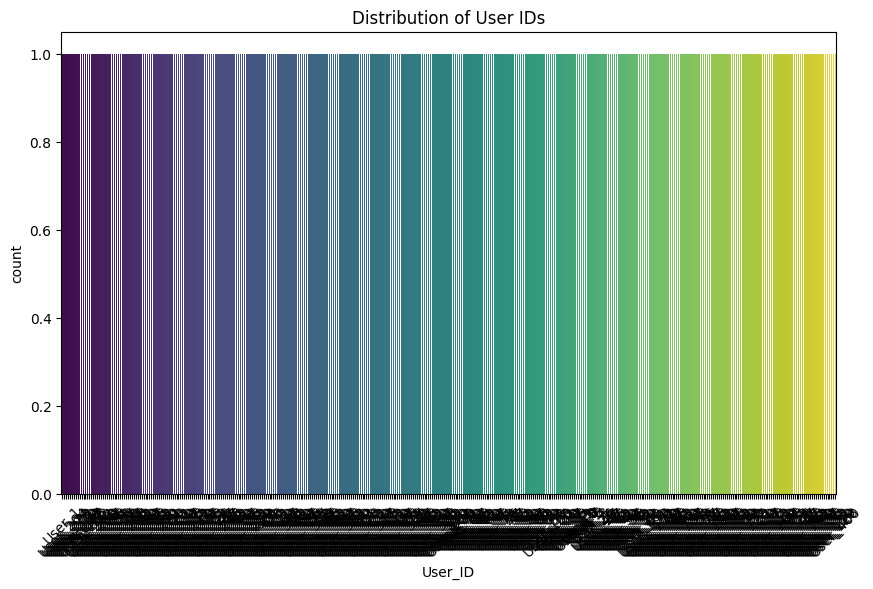

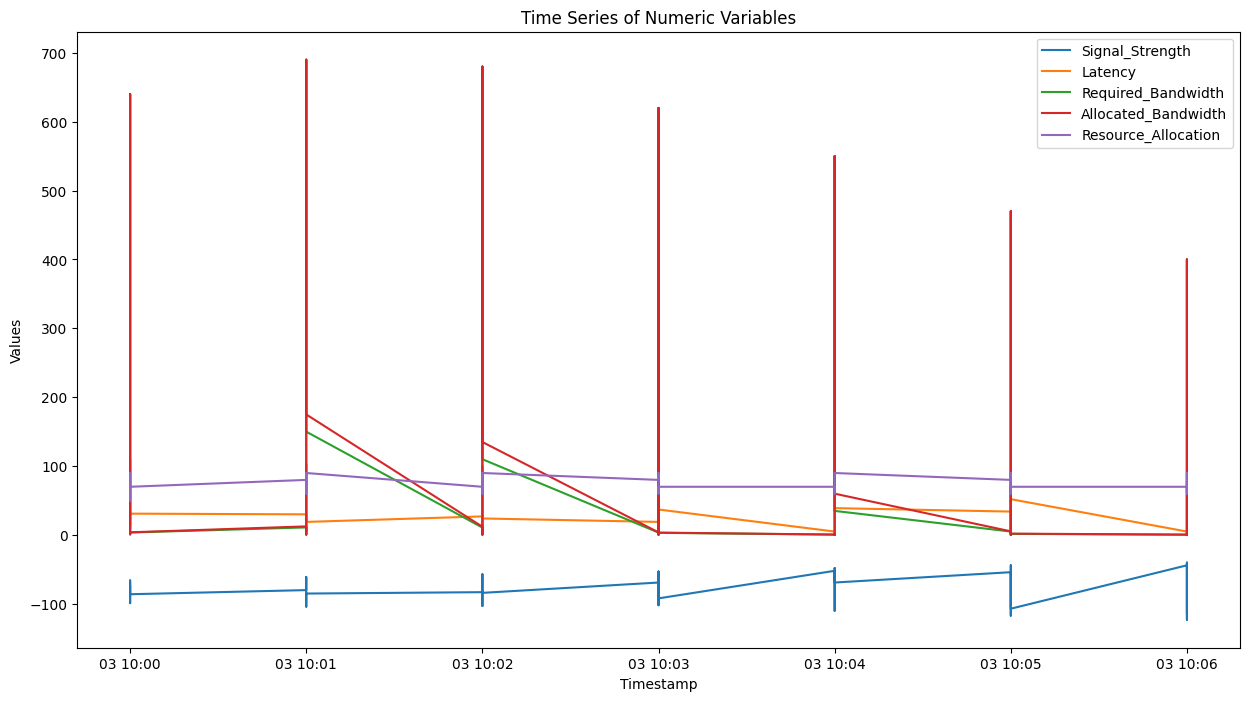

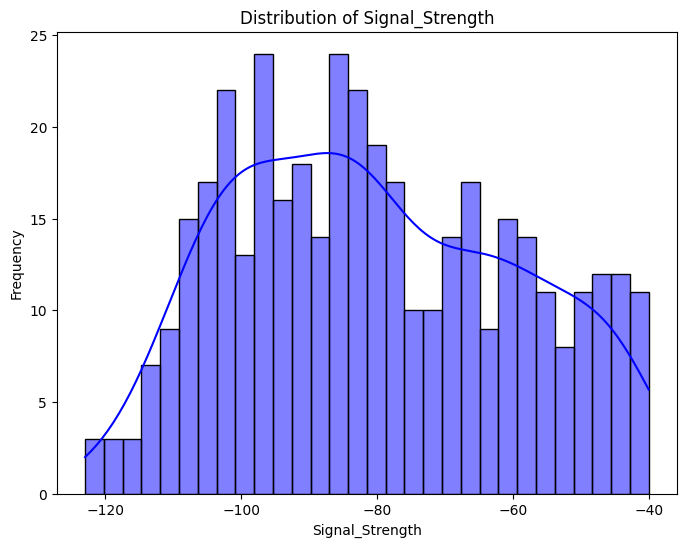

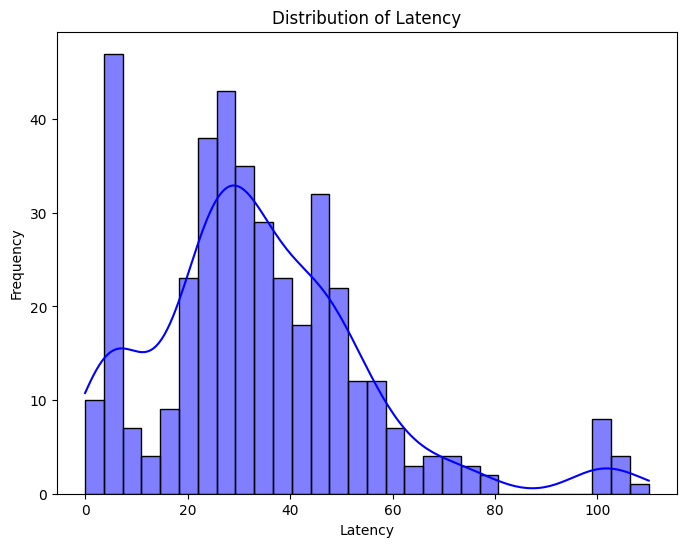

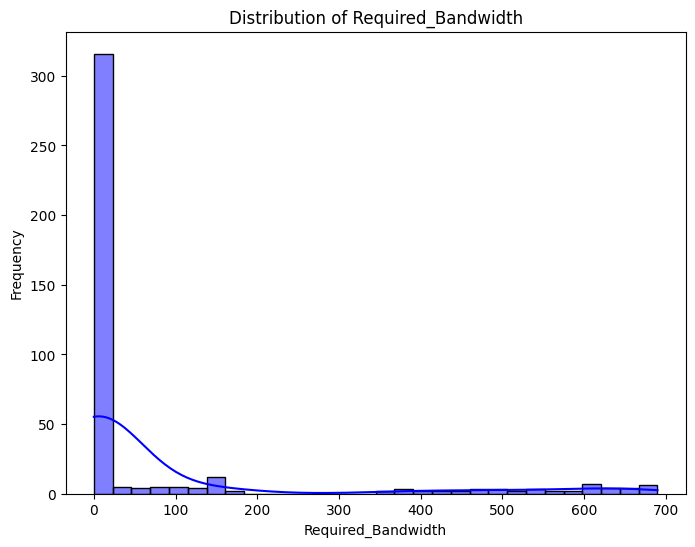

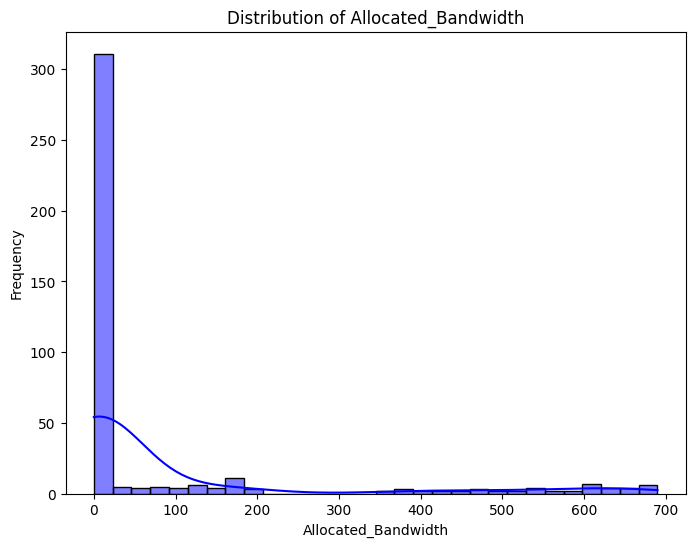

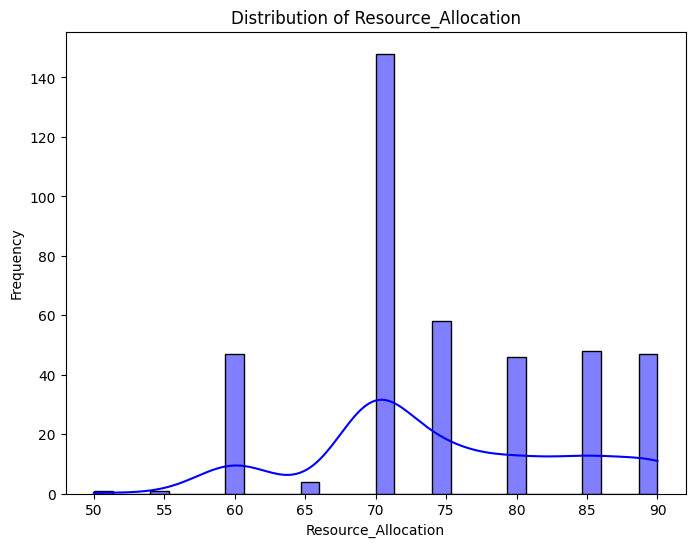

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/content/sample_data/Quality of Service 5G.csv"
df = pd.read_csv(file_path, encoding="latin-1")

# Clean and convert columns with units
def clean_column_data(df, column_name, unit):
    # Remove non-numeric characters (i.e., units like 'dBm', 'ms', 'Mbps', '%')
    df[column_name] = df[column_name].replace({r'[^\d.-]': ''}, regex=True)
    # Convert the column to numeric
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

# Columns to clean
columns_with_units = {
    "Signal_Strength": "dBm",  # Signal Strength (e.g., -75 dBm)
    "Latency": "ms",            # Latency (e.g., 30 ms)
    "Required_Bandwidth": "Mbps",   # Required Bandwidth (e.g., 10 Mbps)
    "Allocated_Bandwidth": "Mbps",  # Allocated Bandwidth (e.g., 15 Mbps)
    "Resource_Allocation": "%"      # Resource Allocation (e.g., 70%)
}

# Apply cleaning function to each column
for column, unit in columns_with_units.items():
    df = clean_column_data(df, column, unit)

# Parse Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Validate column types after cleaning
print("Column Data Types:")
print(df.dtypes)

# ---- Visualizations ---- #

# 1. Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

# 2. Correlation Heatmap for Numeric Columns Only
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# 3. Pairplot for Numeric Variables
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numeric Variables", y=1.02)
plt.show()

# 4. Distribution Plot for Application_Type
if "Application_Type" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="Application_Type", palette="viridis", order=df['Application_Type'].value_counts().index)
    plt.title("Distribution of Application Type")
    plt.xticks(rotation=45)
    plt.show()

# 5. Distribution Plot for User_ID (optional, may be unique)
if "User_ID" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x="User_ID", palette="viridis", order=df['User_ID'].value_counts().index)
    plt.title("Distribution of User IDs")
    plt.xticks(rotation=45)
    plt.show()

# 6. Time Series Plot for Numeric Variables Over Time
plt.figure(figsize=(15, 8))
for column in df.select_dtypes(include=[np.number]).columns:
    plt.plot(df['Timestamp'], df[column], label=column)
plt.title("Time Series of Numeric Variables")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.show()

# 7. Distribution Plots for Numeric Variables
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


# code is working perfectly fine
